<a id='top'></a>

# Homework 5: Bootstrap, Hypothesis Testing and Regression
***

**Name**: Sean McEachern

***

This assignment is due on Canvas by **11:59 PM on Friday November 22**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [661]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Knowledge Check

You are working as a Data Scientist for an internet company. Your co-worker, Bob Dob, is a lovable scamp! Unfortunately, he also makes a lot of mistakes throughout the day as the two of you team up to tackle some inference work regarding your company's customers. In each case, clearly explain why Bob's hypothesis testing setup or conclusion is incorrect.

**Part A**: Bob has some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the proportion of last month's website visitors that bought something.  

Let $X$ be the random variable describing the number of website visitors who bought something in the previous month, and suppose that the population proportion of visitors who bought something is $p$. Bob is particularly interested to see if the data suggests that more than 15% of website visitors actually buy something.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.15$.

**RESPONSE**

If Bob wants to find out if the percent of visitors who buy something is more than 15% then Bob needs to test with null hypothesis of $H_0: p = 0.15$ testing with $\hat{p}$ will only give the percent of a particular sample and Bob is trying to estimate the population proportion not just a sample.

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p > 0.15$.

**RESPONSE**

If Bob is interested to see if the data suggests that more than 15% of website visitors actually buy something then he should test a null hypothesis of $H_0 : p = 0.15$ with an alternative hypothesis of $H_1 : p > 0.15$ because the alternative hypothesis is the one for which we are seeking statistical evidence. The hypothesis with the equals is always the null hypothesis.

**Part C**: Finally on track with reasonable hypotheses of $H_0: p = 0.15$ and $H_1: p > 0.15$, Bob computes a normalized test-statistic of $z = -1.4$ for the sample proportion and concludes that since $z = -1.4 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ (95%) significance level that the proportion of customers who buy something is less than 15%.

**RESPONSE**

In this case Bob is comparing his z-value (test statistic) directly to the alpha value of the significance level. He should be comparing the test statistic to the $Z_\alpha$. He should do this is by using the stats.norm.ppf() function in python and passing the 0.05 into that function to get the probability.

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.15$ and $H_1: p > 0.15$. He computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

**RESPONSE**

This is incorrect because the p-value doesn't give us the probability that the event will occur. In this case there is a probability of 0.03 that the proportion of people that will buy something falls within significance levels. 

---
[Back to top](#top)
<a id='p3'></a>

### [25 points] Problem 2 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [662]:
# n_c = sample size of coffee
# n_n = sample size of naps
# n_cn = smple size of coffee+nap

n = 15
alpha = (1 - 0.975)

# t-critical value
t_crit = stats.t.ppf(1 - (alpha/2), (n - 1))

#function to calculate t-confidence interval
def t_CI(mean, t_crit, stdDev, n):
    lower = mean - t_crit * stdDev/np.sqrt(n) 
    upper = mean + t_crit * stdDev/np.sqrt(n)
    return lower, upper

print(t_crit)
print("The CI for a coffee + nap = ",t_CI(451.3, t_crit, 31.9, 15))
print("The CI for a coffee = ",t_CI(494.2, t_crit, 39.6, 15))
print("The CI for a nap = ",t_CI(492.8, t_crit, 45.2, 15))


2.50956941148
The CI for a coffee + nap =  (430.62981965837918, 471.97018034162085)
The CI for a coffee =  (468.54046578281555, 519.85953421718443)
The CI for a nap =  (463.5118447824056, 522.08815521759436)


**RESPONSE**

1. According to the data, a nap is the best for improving reaction times. Followed by coffee and then coffee+nap.
2. We used a t-distribution because we had small (less than 30) sample size.

**Part B**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [663]:
#function to calculate the difference of t-values
def t_for_two(xbar_1,xbar_2, stddev_1, stddev_2, n_1, n_2 ):
    return float (xbar_1 - xbar_2) / np.sqrt((stddev_1**2/(n_1)) + (stddev_2**2/(n_2)))
    
#nap=n coffee=c
xbar_n = 492.8
xbar_c = 494.2
stddev_n = 45.2
stddev_c = 39.6
n_n = 15
n_c = 15
nu_n_and_c= (n_n - 1) + (n_c - 1)

t_n_and_c = t_for_two(xbar_n,xbar_c, stddev_n, stddev_c, n_n, n_c)

#results
print("t = ", t_n_and_c)
print("p-value =", 1 - stats.t.cdf(t_n_and_c, nu_n_and_c))

t =  -0.0902293636206
p-value = 0.535626340495


**RESPONSE**

$h_0 :$ nap - coffee = 0 (regarding reaction times)

$h_1 :$ nap - coffee > 0

In this case the alternative hypothesis is one-tailed because we are only concerned if the reaction time is faster for a nap than for a coffee.

using the p-value level $\alpha$ test,

$$t = \frac{492.8 - 494.2}{\sqrt{\frac{45.2^2}{15} + \frac{39.6^2}{15}}} = -0.0639407627912$$

using python to calculate the p-value = 0.525264148985

In this case the p-value $> \alpha$ therefore, we cannot reject the null hypothesis.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [664]:
#adding coffee+nap=cn variables
xbar_cn = 451.3 
stddev_cn = 31.9
n_cn = 15

#research calculating the nu for two 
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
#nu_cn_and_c = stats.ttest_ind()

nu_cn_and_c = (n_cn - 1) + (n_c - 1)

#function call
t_cn_and_c = t_for_two(xbar_cn,xbar_c, stddev_cn, stddev_c, n_cn, n_c)

#results
print("t = ", t_cn_and_c)
print("p-value =", stats.t.cdf(t_cn_and_c, nu_cn_and_c))

t =  -3.26744266406
p-value = 0.00143459478477


**RESPONSE**

$h_0 :$ coffee nap - coffee = 0 (regarding reaction times)

$h_1 :$ coffee nap - coffee < 0

Again I am using a one-tail p-value level $\alpha$ test 

$$t = \frac{451.3 - 494.2}{\sqrt{\frac{31.9^2}{15} + \frac{39.6^2}{15}}} = -3.55807934936$$

using python to calculare the p-value = 0.000677507407111

in this case the p-value $< \alpha$ and therefore we reject the null hypothesis for the alternative hypothesis.

In [665]:
# coffee-nap versus nap
t_cn_and_n = t_for_two(xbar_cn,xbar_n, stddev_cn, stddev_n, n_cn, n_n)
nu_cn_and_n = (n_cn - 1) + (n_n - 1)

#results
print("t = ", t_cn_and_n)
print("p-value =", stats.t.cdf(t_cn_and_n, nu_cn_and_n))

t =  -2.90527262421
p-value = 0.00354551572435


$h_0 :$ coffee nap - nap = 0 (regarding reaction times)

$h_1 :$ coffee nap - nap < 0

Again I am using a one-tail p-value level $\alpha$ test 

$$t = \frac{451.3 - 492.8}{\sqrt{\frac{31.9^2}{15} + \frac{45.2^2}{15}}} = -3.44196487176$$

using python to calculare the p-value = 0.000916323095298

in this case the p-value $< \alpha$ and therefore we reject the null hypothesis for the alternative hypothesis.

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

In [666]:
alpha = 1 -0.975
alpha_half = alpha/2
n = 15
nu = n - 1

chi2_lower = stats.chi2.ppf(alpha_half, nu)
chi2_upper = stats.chi2.ppf(1 - alpha_half, nu)

def CI_for_stddev(chi2_lower, chi2_upper, n, stddev):
    lower = np.sqrt((n - 1)*stddev**2)/np.sqrt(chi2_lower)
    upper = np.sqrt((n - 1)*stddev**2)/np.sqrt(chi2_upper)
    return upper,lower

CI_for_stddev_coffe_nap = CI_for_stddev(chi2_lower, chi2_upper, n, stddev_cn)
print("The 97.5% CI for the standard deviation of coffee-nap takers = ", CI_for_stddev_coffe_nap)

The 97.5% CI for the standard deviation of coffee-nap takers =  (22.388646811088421, 54.06880904564165)


**RESPONSE**

To calculate the 97.5% CI for the standard deviation I square rooted the CI for variance 

$$\sqrt{\frac{(n-1)s^2}{X_{\alpha/2, \nu}^{2}}} \leq \sqrt{\sigma^2} \leq \sqrt{\frac{(n-1)s^2}{X_{1 - \alpha/2, \nu}^{2}}}$$

---
[Back to top](#top)
<a id='p4'></a>

### [25 points] Problem 3 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [667]:
df = pd.read_csv("pootef.csv")
df.tail()

,Group,Date,Fed,Ate
119,4,Oct 27 2018,40,35
120,4,Oct 28 2018,40,31
121,4,NaN,40,38
122,4,Oct 30 2018,40,35
123,4,NaN,40,39


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$.

$h_0 : P = 0.90$

$h_1 : P > 0.90$

**Part B**: Complete the function below to test the hypothesis from **Part A** at the $\alpha = 0.05$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement? 

In [782]:
feedings = df['Fed']
bites = df['Ate']

def z_test(bites, feedings, alpha=0.05):
    '''
    Function to test H1: p > 0.90 
    Returns p-value based on H0: p=0.90 
    '''
    p = 0.90
    pHat = np.sum(bites)/np.sum(feedings)
    stddev = np.std(bites)
    n = np.sum(feedings)
    z = (pHat - p)/np.sqrt((p*(1-p))/n)
    
    pvalue = 1 - stats.norm.cdf(z)

    return pvalue 


z_test(bites, feedings, 0.05)

0.30131168747623693

**RESPONSE** 

In this case the p-value is larger than our significance level and we can therefore reject the null hypothesis in favor of the alternative hypothesis.

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.05$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation. 

In [669]:
dfClean = df.dropna(subset = ['Date'])

group1 = dfClean[dfClean['Group']==1]
group2 = dfClean[dfClean['Group']==2]
group3 = dfClean[dfClean['Group']==3]
group4 = dfClean[dfClean['Group']==4]

print("group 1 : ", z_test(group1['Ate'], group1['Fed'], 0.05))
print("group 2 : ", z_test(group2['Ate'], group2['Fed'], 0.05))
print("group 3 : ", z_test(group3['Ate'], group3['Fed'], 0.05))
print("group 4 : ", z_test(group4['Ate'], group4['Fed'], 0.05))

group 1 :  0.603926304102
group 2 :  0.00187324045265
group 3 :  0.833303374646
group 4 :  0.935926719367


**RESPONSE**

First I had to drop all the data that held a "nan" value because this data is incomplete and shouldn't be tested.

Then I tested all the groups seperately, I don't know why the octopus were seperated by group by it is worth testing because whatever the reason for grouping, it could affect the feeding proportions.

In this case all groups except group two could be used to support her hypothesis.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 4 - Simple Linear Regression for Science!

From [Google Trends](https://trends.google.com/trends/?geo=US) data, it appears that interest in "data science" in the United States has steadily increased since 2004. Interest is measured relative to the maximum rate of Google searches for that term over the time period (so the maximum is 100). 

**Part A:** Load up the data in `data_science_interest.csv` into a Pandas DataFrame. Create two new columns:
* `Year` should be the year associated with that data point, and
* `Month` should be the month (1-12) associated with that data point.

Then, make a **scatter plot** (using `pyplot.scatter`) of all of the data points, showing how interest in "data science" has evolved over time. Label the x-axis by year, displaying ticks for Janurary of each year between 2004 and 2019. 

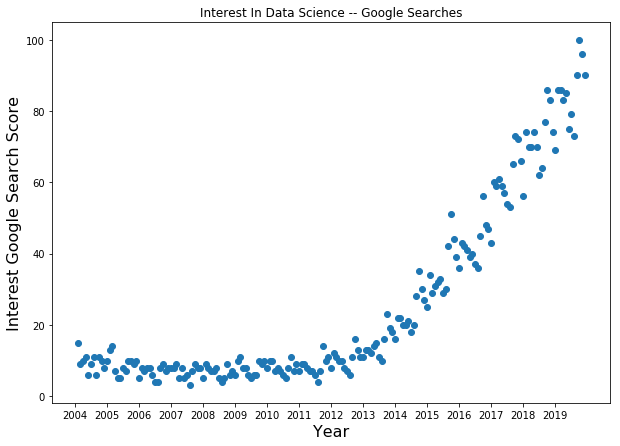

,Year,Month,Interest
0,2004,1,15
1,2004,2,9
2,2004,3,10
3,2004,4,11
4,2004,5,6


In [806]:
#read in file
interest_df = pd.read_csv("data_science_interest.csv")

#parse datetime format and add to new columns
interest_df['Year'] = pd.DatetimeIndex(interest_df['Month']).year
interest_df['Month'] = pd.DatetimeIndex(interest_df['Month']).month

#reorder columns
columnsTitles=["Year","Month","Interest"]
interest_df=interest_df.reindex(columns=columnsTitles)

#scatter plot all data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
x = interest_df['Year']+interest_df['Month']/12
ax.scatter(x, interest_df['Interest'])
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Interest Google Search Score", fontsize=16)
plt.title('Interest In Data Science -- Google Searches')
plt.tick_params(axis='x')
plt.xticks(np.arange(2004, 2020, step=1))
plt.show()

interest_df.head()

**Part B:** These data (and the sea-level data from Homework 4) are a **time series**, where the independent variable is *time* and the dependent quantity is interest in data science. One of the central assumptions of linear regression is that the data are observations generated by some process, independently of one another. With time series data, we need to be careful because there could be some other process affecting the output data. In particular, **annual cycles** are patterns that reoccur each year and are frequently present in time series data. For example, seasonal patterns of weather are annual cycles.

To see what kind of effect time has, make a **line plot** (using `pyplot.plot`) of the interest in data science, as a function of time. Again, include all of the data points and, for the x-axis, label only the tick marks associated with January of each year, and be sure to label your axes.

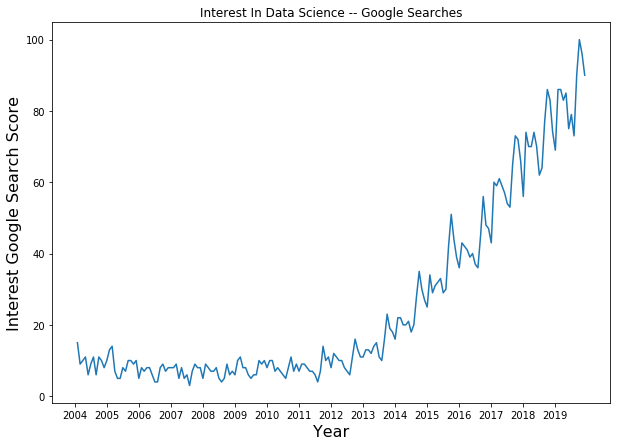

,Year,Month,Interest
0,2004,1,15
1,2004,2,9
2,2004,3,10
3,2004,4,11
4,2004,5,6


In [671]:
#plot by interest over the years including months
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))
plt.plot(x, interest_df['Interest'])
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Interest Google Search Score", fontsize=16)
plt.title('Interest In Data Science -- Google Searches')
plt.tick_params(axis='x')
plt.xticks(np.arange(2004, 2020, step=1))
plt.show()

interest_df.head()

**Part C:** Does your plot from Part B suggest that there is some annual cycle to the interest in data science? During which months is interest in data science highest? What about lowest? Justify your answers using your plot, **and** by computing the mean interest in data science for each month. So, compute 12 values and report them in a markdown table. Do **not** just spit out a horizontal list of 12 numbers. That would be yucky to try to read, and we're scientists.

What do you think accounts for the increased interest in data science during the fall months?

**RESPONSE**

For each year it appears that interest increases throughout the year. In other words interest during winter season tends to dip down and then interest goes up through summer and fall. I think people's interest in data science might increase during the fall months because fall and early winter people do a lot of travelling and holiday shopping and may want to better understand the best ways to do these things.

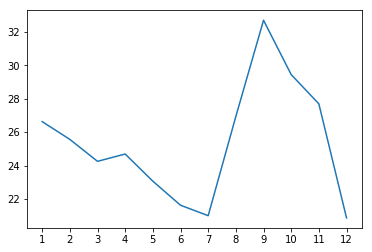

,Year,Month,Interest
0,2004,1,15
1,2004,2,9
2,2004,3,10
3,2004,4,11
4,2004,5,6


In [672]:
jan = interest_df[interest_df['Month']==1]
feb = interest_df[interest_df['Month']==2]
mar = interest_df[interest_df['Month']==3]
apr = interest_df[interest_df['Month']==4]
may = interest_df[interest_df['Month']==5]
jun = interest_df[interest_df['Month']==6]
jul = interest_df[interest_df['Month']==7]
aug = interest_df[interest_df['Month']==8]
sep = interest_df[interest_df['Month']==9]
octb = interest_df[interest_df['Month']==10]
nov = interest_df[interest_df['Month']==11]
dec = interest_df[interest_df['Month']==12]

monthly_mean = [None, np.mean(jan['Interest']),np.mean(feb['Interest']),
                np.mean(mar['Interest']),np.mean(apr['Interest']),
                np.mean(may['Interest']),np.mean(jun['Interest']),
                np.mean(jul['Interest']),np.mean(aug['Interest']),
                np.mean(sep['Interest']),np.mean(octb['Interest']),
                np.mean(nov['Interest']),np.mean(dec['Interest'])]


plt.plot(monthly_mean)
plt.tick_params(axis="x")
plt.xticks(np.arange(1, 13, step=1))
plt.show()

interest_df.head()

**Part D:** (Spoiler alert!) Since there seems to be an annual cycle, one of the fundamental assumptions of our simple linear regression model is not satisfied. Namely, it is not the case that the model-data residuals, $\epsilon_i$, are independent of one another.

So, we need to process our data a bit further before fitting a regression model. One way to address this is to take the mean of all the data each year and use for analysis the time series of annual mean interest in data science. Create a new Pandas DataFrame that consists only of two columns:
* `year`, and
* `interest`, the mean interest in data science from the twelve months in that year.

In [698]:
meanInterest_df = interest_df.groupby(interest_df['Year'])['Interest'].mean()
meanInterest_df = meanInterest_df.reset_index()
meanInterest_df.head(16)

,Year,Interest
0,2004,9.666667
1,2005,8.583333
2,2006,7.083333
3,2007,6.750000
4,2008,6.750000
5,2009,8.083333
6,2010,7.916667
7,2011,8.333333
8,2012,10.500000
9,2013,15.000000


**Part E:** Perform a simple linear regression with `year` as the feature and `interest` as the response (mean annual interest in data science).  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

Then make a scatter plot of the mean annual interest in data science as a function of year, and overlay the estimated regression line. Label your axes and provide a legend.

alpha = -9453.46442736
Bhat = 4.71248885918
pval = 2.67132448218e-05
stderr = 0.770589011013


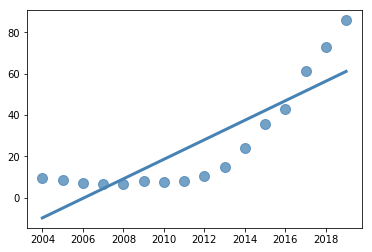

In [801]:
x = meanInterest_df['Year']
y = meanInterest_df['Interest']
Bhat, alphaHat, rval, pval, stderr = stats.linregress(x, y)
print("alpha =", alphaHat)
print("Bhat =", Bhat)
print("pval =", pval)
print("stderr =", stderr)

plt.scatter(x, y, color="steelblue", alpha=0.75, s=100)
plt.plot(x, alphaHat + Bhat*x, color="steelblue", lw=3);

**Part F**: Give a physical interpretation of the coefficient $\hat{\beta}$, estimated from your model. Include addressing whether the relationship between time and interest in data science is positive or negative. Fully justify your responses.

**RESPONSE**

$\hat{\beta}$ has a slope that is increasing over time. This means that interest in data science is increasing over time.

**Part G**: What interest in data science does your simple linear regression model predict in the year 2025? What about in 2050? What are potential drawbacks to this model for interest in data science (think about the minimium and maximum values for the data)? 

**Note**: From Google Trends Documentation, the "interest" variable is defined as: "Interest represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

**RESPONSE**

Using this model to predict future trends, it could be that interest in data science will continue to increase over time. One potential drawback could be that data science will hit a peak interest or some unknown variables could detract interest. Because interest maxes out at 100 there will have to be a peak (and probable decline) interest eventually.

**Part H:** Compute a 80% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result. Why is this a confidence interval for $\beta$ and not for $\hat{\beta}$?

In [802]:
alpha = 1 - 0.80
n = len(x)

yhat = alphaHat + Bhat*x
SSE = np.sum((y-(yhat))**2)
var_hat = SSE/(n-2)
xbar = np.mean(x)

SE_beta = np.sqrt(var_hat/np.sum((x - xbar)**2))

t = stats.t.ppf(alpha/2, n-2)
lower = Bhat - t * SE_beta
upper =  Bhat + t * SE_beta
print("CI = [",upper,",",lower,"]")

CI = [ 3.67602323315 , 5.74895448521 ]


**Part I:** What proportion of the variation in mean annual interest in data science is explained by your linear regression model?

In [805]:
ybar = np.mean(y)
SST  = np.sum((y-ybar)**2)
R2 = 1 - (SSE/SST)
print("R2 :", R2)

R2 : 0.7276189056683344
